# Power Analysis

Power analysis is a tool to estimate the minimum sample size required in order to detect an effect in a test. 

Sample is a part of a population that helps draw inferences about the entire population. Collecting complete information about the population is time-consuming and expensive and sometimes not even possible. Thus, we need an appropriate sample size to infer about the population based on that sample, in other words a sample representative of the population. 

An approach of calculating the sample size is based on effect size. 

We can estimate a sample size given the significance level (alpha) and power which is the probability of rejecting null hypothesis (accepting alternative hypothesis) or of detection of an effect, quantified by a size called effect size. It has been observed that larger sample sizes have the capability to detect small effects.

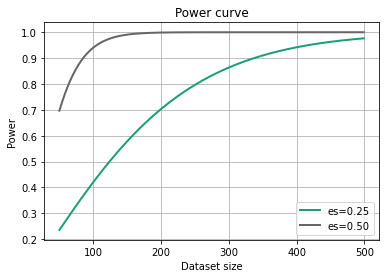

In [2]:
from matplotlib import pyplot
import statsmodels 
from statsmodels.stats.power import TTestIndPower
from numpy import array

#Considering small and moderate effect sizes (es)
effect_sizes = array([0.25, 0.5])
sample_sizes = array(range(50, 500))

PowerAns = TTestIndPower()
#PowerAns.solve_power(effect, power, ratio = 1.0, alpha)
PowerAns.plot_power(dep_var = 'nobs', nobs = sample_sizes, effect_size = effect_sizes)
pyplot.xlabel('Dataset size') 
pyplot.ylabel('Power')
pyplot.title('Power curve')
pyplot.grid()
pyplot.show()

# Sensitivity Analysis (Classification)

Sensitivity analysis provides an approach to quantifying the relationship between model performance and sample data size 
for a given problem and prediction algorithm. 
Datasets may be too small to effectively capture the capability of machine learning model at a larger scale or there may be a point where  data augmentation may not improve model performance. A learning curve yields the sensitivity of performance to size of data the model is trained with. 

In [ ]:
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

#Considering binary classification dataset and nonlinear predictive model (Decision Tree)
def load_dataset(n_samples):
    """ Prepare dataset of a given size """
    
    X, y = make_classification(n_samples = int(n_samples), n_features = 20, random_state = 1)
    return X, y

def evaluate_model(X, y):
    """ Model evaluated on training data, returning mean (standard deviation) as model accuracy """
    
    cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
    model = DecisionTreeClassifier()
    scores = cross_val_score(model, X, y, scoring = 'accuracy', cv = cv, n_jobs = -1)
    return [scores.mean(), scores.std()]

#consider a range of data sizes depending on the runtime you're willing to spend
sizes = [1000, 5000, 10000, 50000, 100000, 500000, 900000]

means, stds = list(), list()
for n_samples in sizes:
    X, y = load_dataset(n_samples)
    mean, std = evaluate_model(X, y)
    means.append(mean)
    stds.append(std)
    
#PLOT (on logX scale)
err = [min(1, s*2) for s in stds]       #define error bar as 2 standard deviations from mean
pyplot.errorbar(sizes, means, yerr = err, fmt = '-o')
ax = pyplot.gca()
ax.set_xscale("log", nonpositive = 'clip')
pyplot.ylim([0.95,1.0])
pyplot.xlabel('Data size')
pyplot.ylabel('Performance')
pyplot.title('Learning curve')
pyplot.grid()
pyplot.show()

# Sensitivity Analysis (Regression)

In [ ]:
from matplotlib import pyplot
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

#Considering boosted predictive model (XGB)
def load_dataset(n_samples):
    """ Prepare dataset of a given size """
    
    X, y, x1 = make_regression(n_samples = int(n_samples), n_features = 5, n_targets = 1, coef = True, random_state = 1)
    return X, y

def evaluate_model(X, y):
    """ Model evaluated on training data, returning mean (standard deviation) as model accuracy """
      
    model = XGBRegressor()
    scores = cross_val_score(model, X, y, cv = 5, scoring = 'r2', n_jobs = -1)
    return [scores.mean(), scores.std()]


sizes = [1000, 5000, 10000, 50000, 100000, 500000, 900000]
means, stds = list(), list()
for n_samples in sizes:
    X, y = load_dataset(n_samples)
    mean, std = evaluate_model(X, y)
    means.append(mean)
    stds.append(std)

#PLOT (on logX scale)
err = [min(1, s*2) for s in stds]
pyplot.errorbar(sizes, means, yerr = err, fmt = '-o')
ax = pyplot.gca()
ax.set_xscale("log", nonpositive = 'clip')
pyplot.ylim([0.6,1.0])
pyplot.xlabel('Data size')
pyplot.ylabel('Performance')
pyplot.title('Learning curve')
pyplot.grid()
pyplot.show()


The trends of increasing mean model (classification & regression) performance with sample data size and decreasing model variance (measured using the standard deviation of accuracy) are seen.
The estimated mean performance sees a drop-off with 10^6 rows of data, suggesting that the model might measure statistical noise in the estimate further. This hints an upper bound on model performance and it is likely that more data beyond this point will not improve the model with the chosen configuration.